In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ALGO = 'ilqr' # gp_mpc or rl/ppo or rl/sac, ilqr, gpmpc_acados
STUDY = 'hp_study_vizier' # hp_study_normalized_objective or hp_study_unnormalized_objective
STUDY_DIR = os.path.join(os.getcwd(), ALGO, STUDY)
HP_KINDS = os.listdir(STUDY_DIR)
PICKLE_NAME = 'metrics.pkl'
METRICS = ['average_rmse'] # average_return or exponentiated_avg_return


In [3]:
results = {}
for HP_KIND in HP_KINDS:
    RUNS = os.listdir(os.path.join(STUDY_DIR, HP_KIND))
    results[HP_KIND] = []
    for RUN in RUNS:
        result_path = os.path.join(STUDY_DIR, HP_KIND, RUN, PICKLE_NAME)
        try:
            with open(result_path, 'rb') as f:
                result = pickle.load(f)
                results[HP_KIND].append(result)
        except:
            pass


In [4]:
# put results into a pandas dataframe
df = pd.DataFrame()
index = 0
for HP_KIND in HP_KINDS:
    for result in results[HP_KIND]:
        index += 1
        df = pd.concat([df, pd.DataFrame(result)], ignore_index=True)
        # df = df.append(result, ignore_index=True)
        # add HP_KIND column
        df.loc[df.index[-1], 'HP_KIND'] = HP_KIND


In [5]:
df.groupby('HP_KIND')[METRICS[0]].describe()

,count,mean,std,min,25%,50%,75%,max
HP_KIND,,,,,,,,
default,20.0,0.030402,0.001890,0.026877,0.029095,0.030473,0.031854,0.034524
optimized,20.0,0.029583,0.003994,0.024170,0.026727,0.028698,0.030714,0.039838


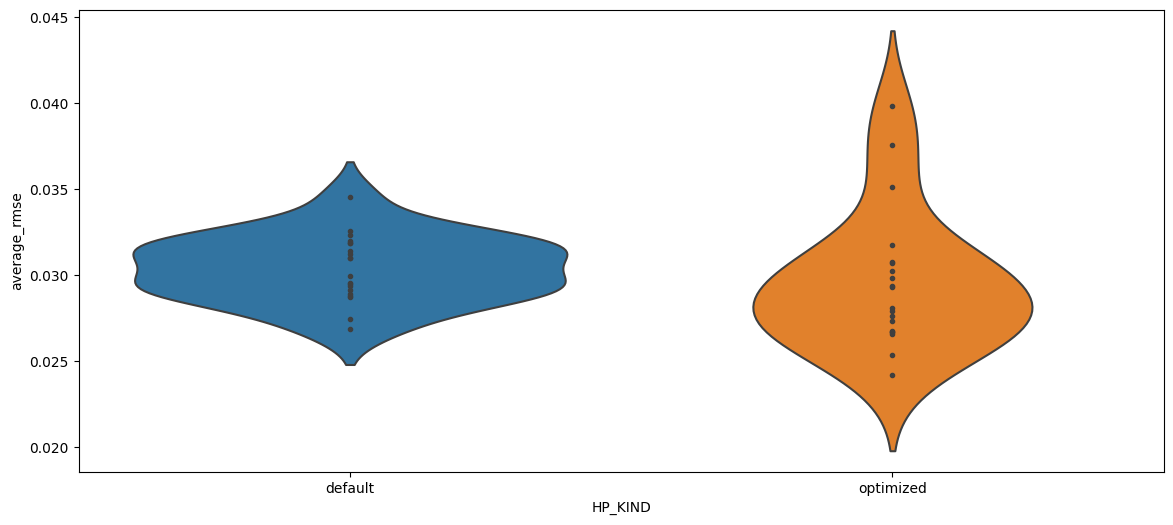

In [6]:
# plot boxen plot for each HP_KIND

plt.figure(figsize=(14, 6))
# plt.rcParams.update({'font.size': 15})
# change the order of the boxen plot
order=HP_KINDS
ax = sns.violinplot(x='HP_KIND', y=METRICS[0], data=df, inner='points', order=order)
# plt.setp(ax.get_xticklabels())
plt.ylabel(METRICS[0])
# plt.ylim([120, 150])
plt.show()
plt.close()